In [1]:
#notebook to compare our autoencoder clustering to our kmeans clustering

from __future__ import absolute_import, division, print_function, unicode_literals

#import tensorflow as tf

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

plt.style.use('demo_style.mplstyle')

In [2]:
#get job info

import os

os.environ["SLURM_JOB_ID"]


'30919360'

In [3]:
#load our kmeans labels

q003_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q003_kmeans_labels_nocurrent.npy')
q103_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q103_kmeans_labels_nocurrent.npy')

In [4]:
#load our data

q003_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_data.npy')
q103_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_data.npy') 

qall_data = np.concatenate((q003_data, q103_data), axis=0)

In [5]:
#load our encoded and pca data

encoded_all = np.load('encoded_all.npy')
img_pca = np.load('img_pca.npy')

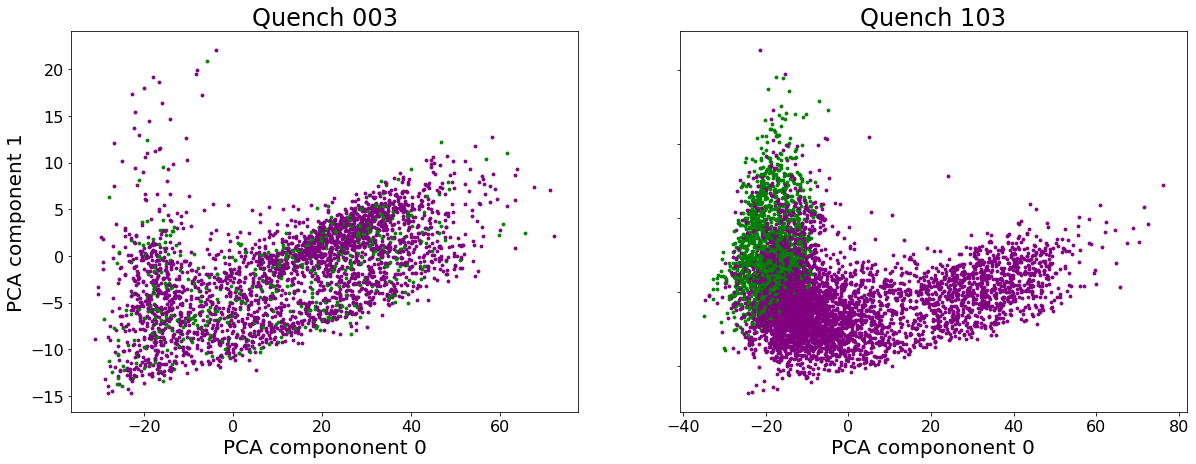

In [6]:
qall_labels = np.concatenate((q003_labels, q103_labels), axis=0)

#boundary 1
boundary1 = q003_data.shape[0]

color_key=['purple','green']
color_label=[]
for label in qall_labels:
    if label == 0:
        color_label.append(color_key[0])
    else:
        color_label.append(color_key[1])

msize = 8

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,7)
for i in range(qall_data.shape[0]):
    if i <= q003_data.shape[0]:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
    else:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

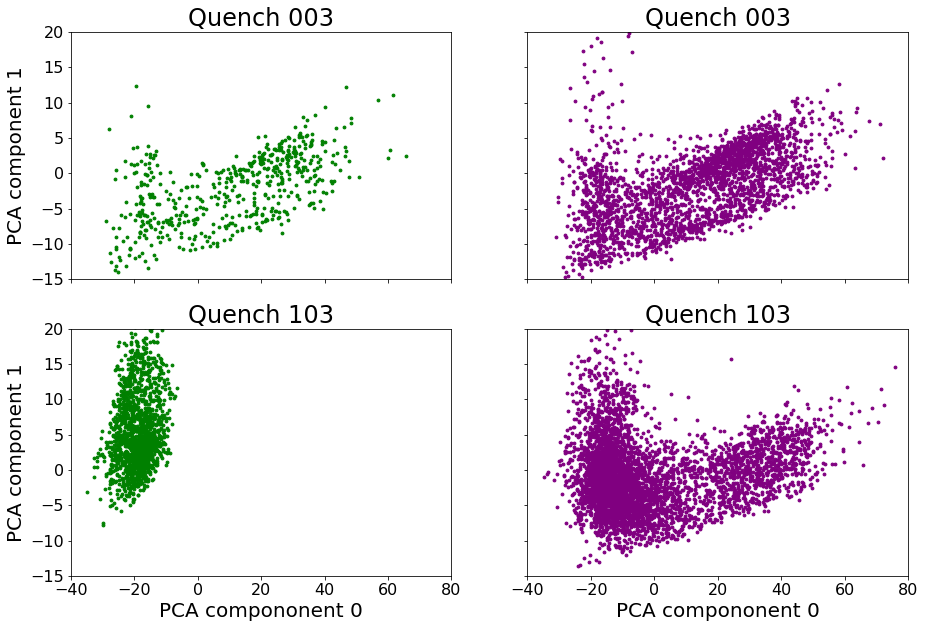

In [7]:
#make additoinal figure plotting green and purple separately

#make the same plot but show all quenches separately

msize = 8
xlimits = (-40,80)
ylimits = (-15,20)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        axs[0, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 0].set_title('Quench 003')
        axs[0, 0].set_xlim(xlimits)
        axs[0, 0].set_ylim(ylimits)
    elif (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[0, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 1].set_title('Quench 003')
        axs[0, 1].set_xlim(xlimits)
        axs[0, 1].set_ylim(ylimits)
    elif (i > q003_data.shape[0]) and (color_label[i]=='green'):
        axs[1, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 0].set_title('Quench 103')
        axs[1, 0].set_xlim(xlimits)
        axs[1, 0].set_ylim(ylimits)        
    elif (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[1, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 1].set_title('Quench 103')
        axs[1, 1].set_xlim(xlimits)
        axs[1, 1].set_ylim(ylimits)        

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [8]:
#select and plot some spectrograms (3) from each region and with each label

#divide the PCA space into 3 regions-- left v, center v, right v

xpad=5
ypad=2.5
num_images = 3

#left v
lx=-20
ly=5
leftvxmin = lx-xpad 
leftvxmax = lx+xpad
leftvymin = ly-ypad 
leftvymax = ly+ypad

#center v
cx=-15
cy=-5
centervxmin = cx-xpad 
centervxmax = cx+xpad
centervymin = cy-ypad 
centervymax = cy+ypad

#right v
rx=25
ry=2
rightvxmin = rx-xpad 
rightvxmax = rx+xpad
rightvymin = ry-ypad 
rightvymax = ry+ypad

colormap='pink'


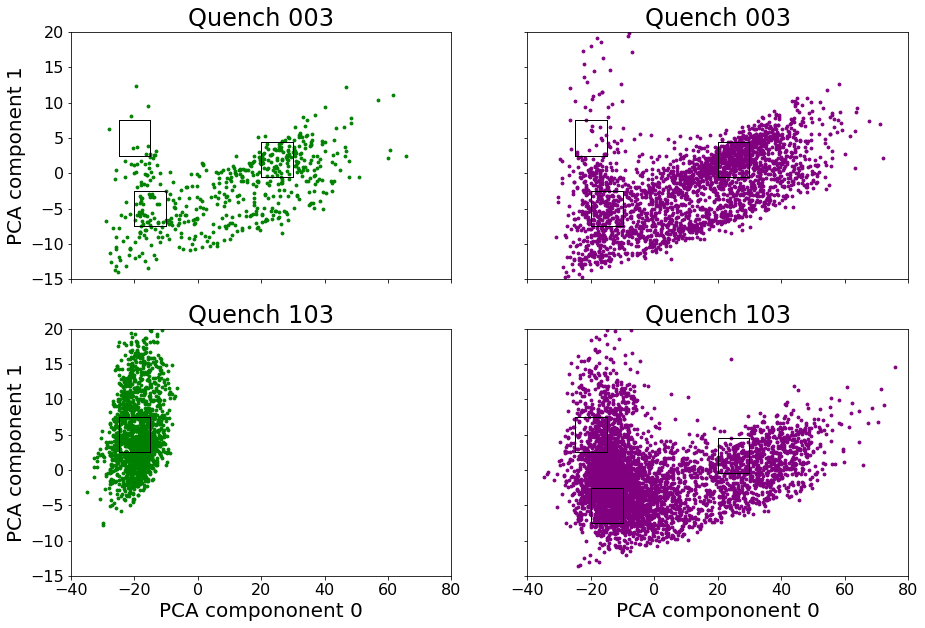

In [9]:
#draw boxes that show where our pca samples come from

import matplotlib.patches as patches

msize = 8
xlimits = (-40,80)
ylimits = (-15,20)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        axs[0, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 0].set_title('Quench 003')
        axs[0, 0].set_xlim(xlimits)
        axs[0, 0].set_ylim(ylimits)
        axs[0, 0].add_patch(patches.Rectangle((leftvxmin, leftvymin), xpad*2, ypad*2, fill=False))
        axs[0, 0].add_patch(patches.Rectangle((centervxmin, centervymin), xpad*2, ypad*2, fill=False)) 
        axs[0, 0].add_patch(patches.Rectangle((rightvxmin, rightvymin), xpad*2, ypad*2, fill=False)) 
    elif (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[0, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 1].set_title('Quench 003')
        axs[0, 1].set_xlim(xlimits)
        axs[0, 1].set_ylim(ylimits)
        axs[0, 1].add_patch(patches.Rectangle((leftvxmin, leftvymin), xpad*2, ypad*2, fill=False))
        axs[0, 1].add_patch(patches.Rectangle((centervxmin, centervymin), xpad*2, ypad*2, fill=False)) 
        axs[0, 1].add_patch(patches.Rectangle((rightvxmin, rightvymin), xpad*2, ypad*2, fill=False)) 
    elif (i > q003_data.shape[0]) and (color_label[i]=='green'):
        axs[1, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 0].set_title('Quench 103')
        axs[1, 0].set_xlim(xlimits)
        axs[1, 0].set_ylim(ylimits)
        axs[1, 0].add_patch(patches.Rectangle((leftvxmin, leftvymin), xpad*2, ypad*2, fill=False))
    elif (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[1, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 1].set_title('Quench 103')
        axs[1, 1].set_xlim(xlimits)
        axs[1, 1].set_ylim(ylimits)
        axs[1, 1].add_patch(patches.Rectangle((leftvxmin, leftvymin), xpad*2, ypad*2, fill=False))
        axs[1, 1].add_patch(patches.Rectangle((centervxmin, centervymin), xpad*2, ypad*2, fill=False)) 
        axs[1, 1].add_patch(patches.Rectangle((rightvxmin, rightvymin), xpad*2, ypad*2, fill=False))         

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

q003_green_left
[123, 243, 354, 1568, 1642]
These are the random images we chose to display:
[1642 1568  243]


<Figure size 2160x720 with 0 Axes>

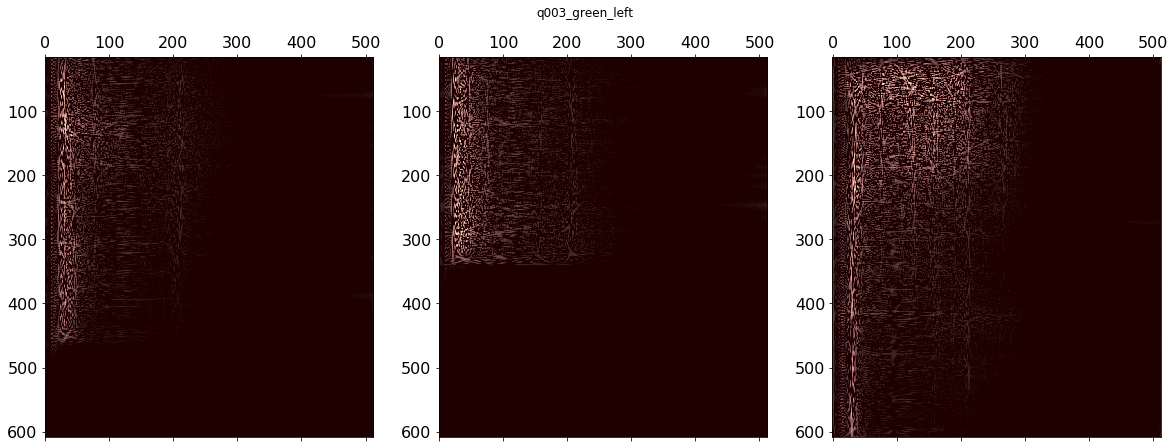

In [10]:
#quench 3, green, left

from matplotlib.pyplot import matshow

q003_green_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q003_green_left.append(i)
        
print("q003_green_left")        
print(q003_green_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q003_green_left')
plt.show()

q003_green_center
[12, 53, 101, 179, 181, 266, 334, 542, 572, 661, 700, 819, 827, 848, 956, 1017, 1113, 1278, 1480, 1603, 1670, 1710, 1789, 1818, 1858, 1889, 2264, 2298, 2313, 2539, 2700, 2809, 2874, 2891, 2924, 2944, 3038, 3048]
These are the random images we chose to display:
[2539  819 2313]


<Figure size 2160x720 with 0 Axes>

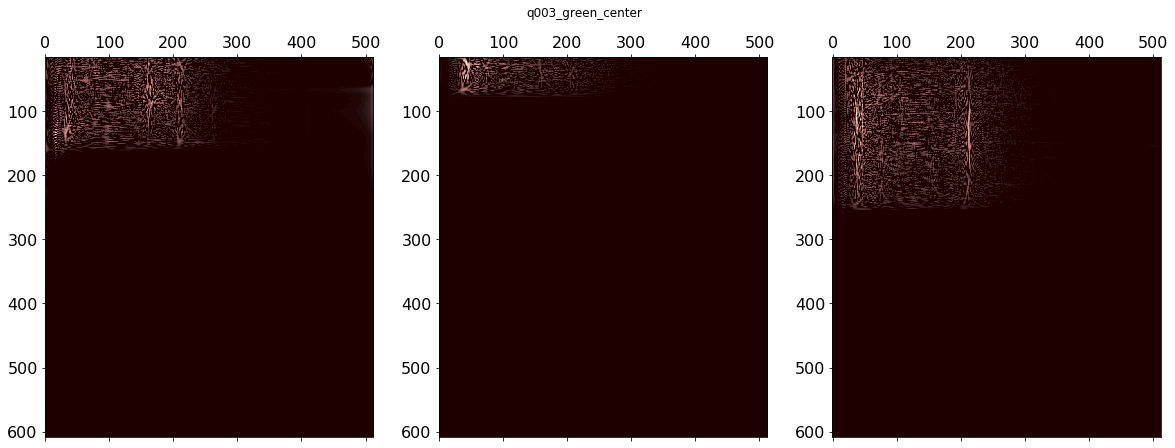

In [11]:
#quench 3, green, center

q003_green_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q003_green_center.append(i)
        
print("q003_green_center")        
print(q003_green_center)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q003_green_center')
plt.show()


q003_green_right
[277, 414, 442, 571, 613, 724, 794, 845, 880, 973, 993, 1028, 1064, 1116, 1172, 1202, 1221, 1229, 1283, 1331, 1363, 1435, 1563, 1567, 1572, 1647, 1651, 1656, 1740, 1770, 1771, 1914, 2011, 2091, 2111, 2118, 2209, 2212, 2240, 2262, 2308, 2363, 2508, 2510, 2512, 2578, 2581, 2624, 2636, 2665, 2763, 2813, 2843, 2861, 2869, 2946, 3039, 3054, 3061, 3062, 3115]
These are the random images we chose to display:
[ 613 2581 1914]


<Figure size 2160x720 with 0 Axes>

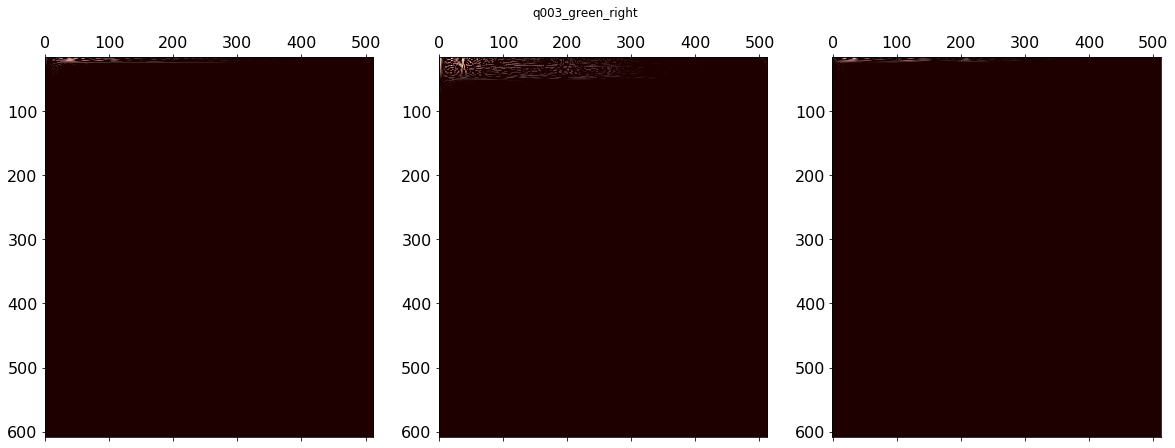

In [12]:
#quench 3, green, right

q003_green_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q003_green_right.append(i)
        
print("q003_green_right")        
print(q003_green_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q003_green_right')
plt.show()

q003_purple_left
[310, 365, 424, 493, 503, 607, 737, 879, 1001, 1336, 1550, 1798, 2045, 2894]
These are the random images we chose to display:
[ 493 1550  310]


<Figure size 2160x720 with 0 Axes>

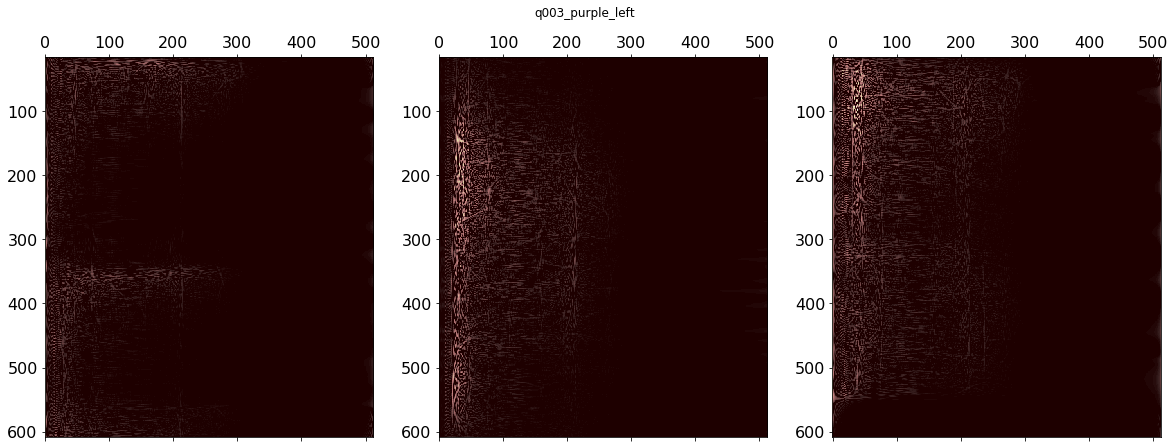

In [13]:
#quench 3, purple, left

q003_purple_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q003_purple_left.append(i)
        
print("q003_purple_left")        
print(q003_purple_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q003_purple_left')
plt.show()


q003_purple_center
[1, 20, 65, 70, 78, 89, 143, 162, 173, 183, 192, 194, 200, 205, 211, 212, 231, 254, 270, 312, 341, 356, 384, 386, 388, 410, 473, 507, 550, 560, 591, 624, 652, 653, 692, 706, 716, 740, 758, 795, 797, 835, 870, 898, 926, 965, 981, 985, 1004, 1007, 1018, 1030, 1036, 1103, 1135, 1159, 1204, 1228, 1239, 1261, 1349, 1354, 1378, 1382, 1386, 1407, 1454, 1456, 1469, 1495, 1500, 1503, 1522, 1653, 1655, 1671, 1687, 1705, 1732, 1741, 1752, 1764, 1766, 1776, 1778, 1803, 1855, 1896, 1956, 1963, 1987, 1990, 2005, 2012, 2077, 2097, 2105, 2126, 2145, 2180, 2201, 2241, 2261, 2273, 2335, 2357, 2403, 2429, 2481, 2486, 2494, 2507, 2527, 2532, 2556, 2576, 2580, 2587, 2603, 2604, 2648, 2690, 2692, 2698, 2701, 2715, 2742, 2798, 2818, 2871, 2900, 2920, 2938, 2943, 2989, 2995, 3013, 3024, 3059, 3089]
These are the random images we chose to display:
[2273  797   65]


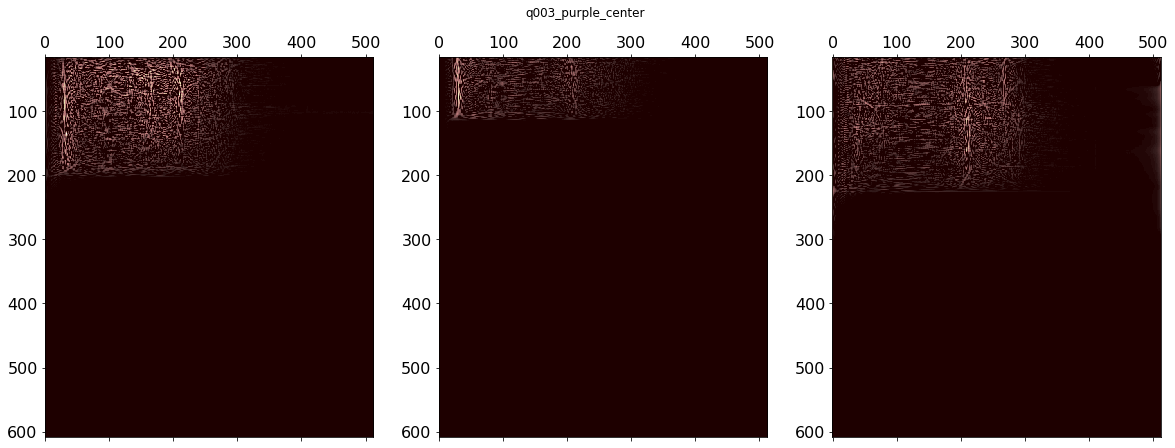

In [14]:
#quench 3, purple, center

q003_purple_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q003_purple_center.append(i)
        
print("q003_purple_center")        
print(q003_purple_center)        

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q003_purple_center')
plt.show()

q003_purple_right
[0, 3, 5, 6, 9, 10, 11, 30, 33, 36, 40, 42, 55, 56, 69, 79, 98, 106, 114, 160, 172, 174, 186, 191, 193, 198, 227, 238, 242, 273, 284, 325, 328, 340, 342, 390, 391, 403, 415, 425, 426, 445, 447, 449, 460, 463, 465, 471, 489, 498, 505, 520, 525, 538, 543, 546, 551, 558, 564, 575, 601, 604, 611, 626, 633, 634, 645, 650, 665, 676, 677, 683, 684, 685, 705, 711, 717, 722, 728, 761, 766, 798, 806, 812, 815, 821, 825, 842, 844, 875, 894, 899, 916, 921, 923, 925, 928, 930, 934, 950, 955, 970, 982, 997, 1000, 1008, 1031, 1038, 1045, 1053, 1065, 1072, 1079, 1090, 1095, 1104, 1119, 1130, 1132, 1133, 1143, 1153, 1155, 1166, 1175, 1179, 1191, 1193, 1196, 1215, 1219, 1240, 1245, 1256, 1262, 1264, 1288, 1314, 1317, 1320, 1334, 1347, 1350, 1360, 1365, 1367, 1375, 1400, 1446, 1485, 1486, 1488, 1511, 1521, 1527, 1529, 1543, 1551, 1559, 1569, 1579, 1582, 1615, 1627, 1648, 1652, 1666, 1673, 1683, 1688, 1709, 1714, 1730, 1734, 1747, 1759, 1765, 1775, 1777, 1812, 1816, 1817, 1833, 1835, 183

<Figure size 2160x720 with 0 Axes>

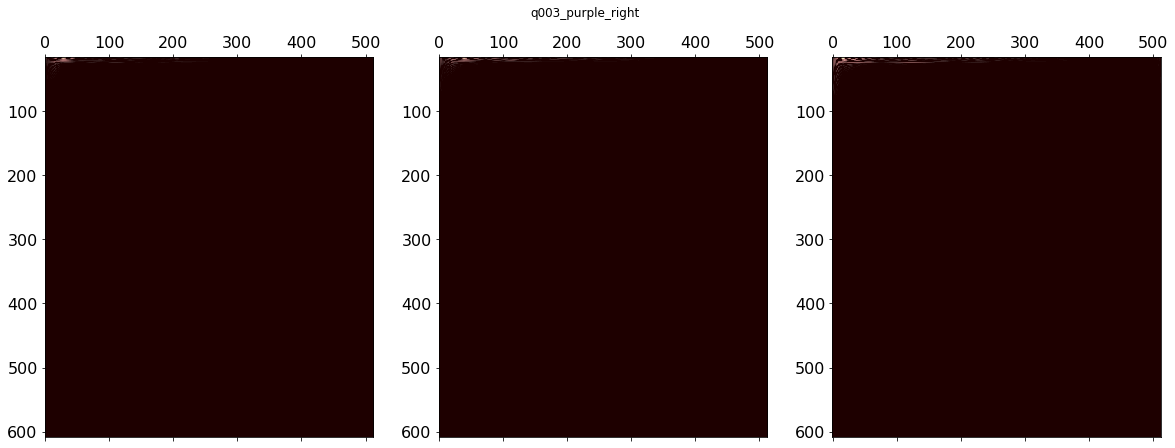

In [22]:
#quench 3, purple, right

q003_purple_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q003_purple_right.append(i)
        
print("q003_purple_right")        
print(q003_purple_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q003_purple_right')
plt.show()


q103_green_left
[3311, 3321, 3338, 3352, 3365, 3377, 4088, 4117, 4152, 4262, 4264, 4292, 4316, 4354, 4369, 4391, 4425, 4429, 4437, 4440, 4455, 4487, 4572, 4576, 4633, 4640, 4654, 4674, 4688, 4700, 4723, 4730, 4756, 4801, 4834, 4863, 4888, 4902, 4905, 4927, 4947, 4988, 5035, 5078, 5082, 5090, 5145, 5151, 5185, 5197, 5199, 5225, 5248, 5254, 5263, 5313, 5317, 5320, 5355, 5360, 5380, 5398, 5407, 5412, 5439, 5440, 5474, 5476, 5503, 5518, 5519, 5528, 5536, 5542, 5550, 5555, 5563, 5567, 5569, 5577, 5626, 5630, 5644, 5651, 5653, 5672, 5686, 5704, 5706, 5711, 5723, 5737, 5742, 5745, 5762, 5768, 5802, 5815, 5838, 5855, 5860, 5874, 5881, 5905, 5914, 5934, 5946, 5951, 5955, 5956, 5989, 5991, 6002, 6004, 6009, 6027, 6048, 6065, 6138, 6159, 6185, 6190, 6212, 6217, 6225, 6236, 6264, 6270, 6297, 6306, 6313, 6317, 6324, 6325, 6328, 6334, 6356, 6360, 6362, 6394, 6417, 6419, 6435, 6440, 6468, 6473, 6476, 6485, 6501, 6508, 6522, 6531, 6535, 6539, 6577, 6598, 6603, 6604, 6618, 6629, 6634, 6642, 6669, 6672,

<Figure size 2160x720 with 0 Axes>

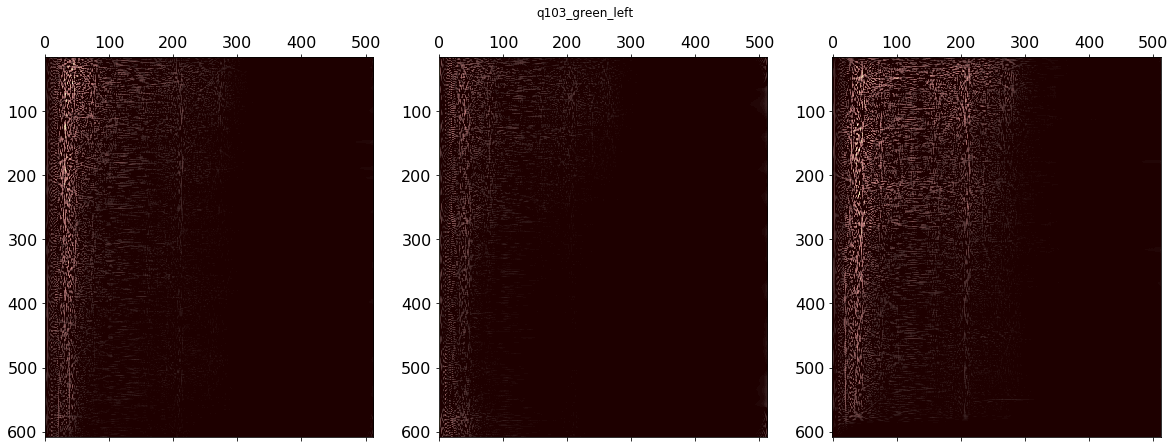

In [16]:
#quench 103, green, left

q103_green_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q103_green_left.append(i)
        
print("q103_green_left")        
print(q103_green_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_green_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q103_green_left')
plt.show()

In [17]:
#quench 103, green, center

#none


In [18]:
#quench 103, green, right

#none


q103_purple_left
[3207, 3257, 3277, 3316, 3361, 3429, 3803, 3915, 3918, 3956, 3959, 3981, 3984, 3986, 4012, 4029, 4054, 4075, 4083, 4119, 4130, 4139, 4147, 4208, 4227, 4235, 4249, 4304, 4331, 4338, 4339, 4397, 4405, 4494, 4515, 4534, 4617, 4622, 4671, 4704, 4731, 4734, 4742, 4746, 4758, 4759, 4817, 4864, 4961, 4968, 4997, 5028, 5072, 5093, 5095, 5122, 5161, 5182, 5218, 5264, 5279, 5300, 5357, 5463, 5496, 5541, 5652, 5726, 5816, 5861, 5864, 5987, 5994, 6039, 6057, 6068, 6094, 6144, 6167, 6173, 6208, 6215, 6216, 6223, 6238, 6260, 6309, 6350, 6401, 6402, 6420, 6509, 6544, 6649, 6651, 6682, 6711, 6743, 6746, 6779, 6833, 6866, 6895, 6964, 7030, 7052, 7123, 7124, 7132, 7137, 7139, 7147, 7198, 7261, 7263, 7297, 7374, 7402, 7444, 7460, 7489, 7494, 7535, 7549, 7558, 7580, 7635, 7645, 7670, 7701, 7715, 7766, 7787, 7793, 7890, 7936, 8028, 8094, 8096, 8105, 8110, 8112, 8147, 8182, 8186, 8273, 8317, 8323, 8368, 8383, 8387, 8408, 8413, 8439, 8486, 8507, 8592, 8594, 8602, 8625, 8640, 8708, 8739, 8773

<Figure size 2160x720 with 0 Axes>

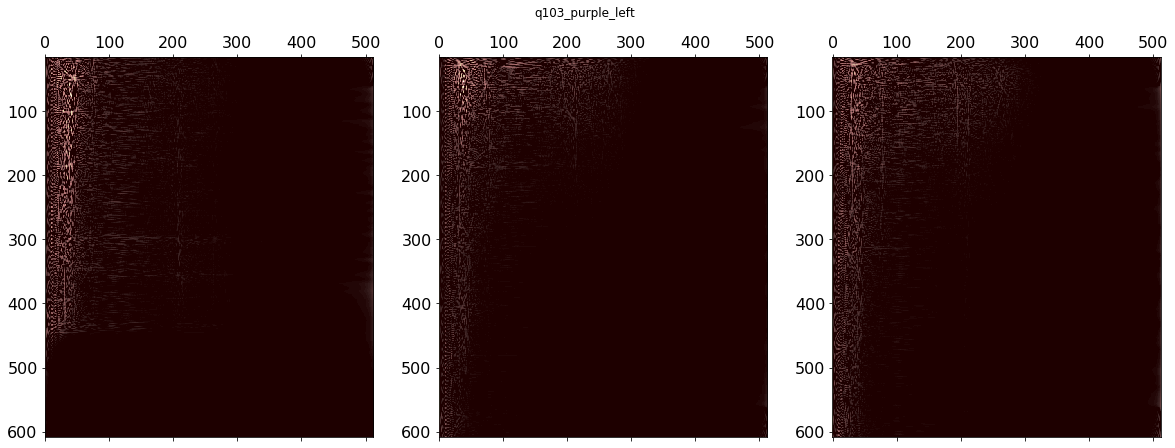

In [19]:
#quench 103, purple, left

q103_purple_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q103_purple_left.append(i)
        
print("q103_purple_left")        
print(q103_purple_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q103_purple_left')
plt.show()

q103_purple_center
[6637, 6639, 6641, 6648, 6652, 6662, 6674, 6681, 6698, 6702, 6718, 6719, 6728, 6753, 6756, 6761, 6774, 6783, 6803, 6818, 6826, 6831, 6837, 6839, 6847, 6888, 6900, 6937, 6981, 6996, 6999, 7009, 7016, 7022, 7053, 7143, 7148, 7156, 7160, 7169, 7190, 7221, 7249, 7267, 7278, 7280, 7299, 7304, 7316, 7326, 7328, 7345, 7376, 7419, 7431, 7451, 7456, 7461, 7465, 7472, 7474, 7482, 7532, 7547, 7555, 7556, 7562, 7563, 7574, 7575, 7588, 7608, 7618, 7626, 7634, 7646, 7663, 7665, 7667, 7679, 7692, 7705, 7708, 7718, 7722, 7725, 7729, 7731, 7740, 7752, 7761, 7768, 7769, 7770, 7796, 7797, 7799, 7803, 7814, 7823, 7824, 7825, 7837, 7845, 7848, 7861, 7872, 7892, 7893, 7894, 7899, 7914, 7917, 7925, 7926, 7932, 7956, 8004, 8010, 8033, 8055, 8081, 8111, 8125, 8132, 8141, 8148, 8157, 8160, 8165, 8166, 8176, 8190, 8200, 8201, 8237, 8250, 8265, 8280, 8293, 8298, 8318, 8328, 8334, 8338, 8344, 8355, 8358, 8366, 8370, 8372, 8378, 8385, 8393, 8398, 8402, 8421, 8428, 8447, 8466, 8469, 8472, 8488, 85

<Figure size 2160x720 with 0 Axes>

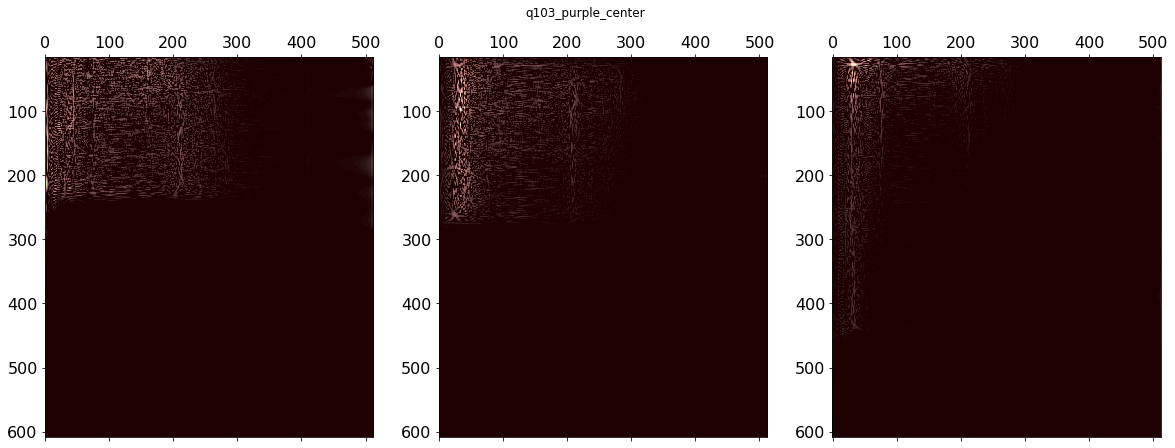

In [20]:
#quench 103, purple, center

q103_purple_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q103_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q103_purple_center.append(i)
        
print("q103_purple_center")        
print(q103_purple_center)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q103_purple_center')
plt.show()


q103_purple_right
[6654, 6707, 6715, 6752, 6898, 6902, 7115, 7228, 7285, 7416, 7428, 7438, 7442, 7521, 7529, 7652, 7935, 7949, 7955, 8042, 8065, 8152, 8187, 8203, 8211, 8236, 8316, 8353, 8371, 8505, 8558, 8654, 8780, 8829, 8902, 8913, 8926, 8959, 9006, 9035, 9089, 9134, 9177, 9202, 9326, 9338, 9356, 9437, 9490, 9589, 9721]
These are the random images we chose to display:
[8203 7438 7428]


<Figure size 2160x720 with 0 Axes>

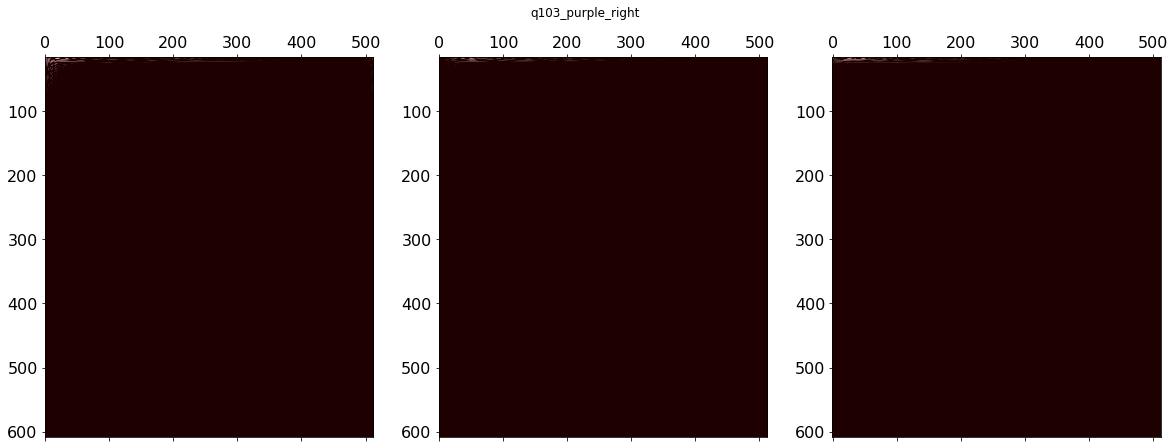

In [21]:
#quench 103, purple, right

q103_purple_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q103_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q103_purple_right.append(i)
        
print("q103_purple_right")        
print(q103_purple_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))
ax_l.matshow(show_images[0,:,:],cmap=colormap)
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:],cmap=colormap)
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:],cmap=colormap)
ax_r.axis('equal')
fig.suptitle('q103_purple_right')
plt.show()
